In [1]:
import pandas as pd

# Load the dataset
file_path = 'Alphabets_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head(), data.info(), data.describe(), data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


(  letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
 0      T     2     8      3       5      1     8    13      0      6      6   
 1      I     5    12      3       7      2    10     5      5      4     13   
 2      D     4    11      6       8      6    10     6      2      6     10   
 3      N     7    11      6       6      3     5     9      4      6      4   
 4      G     2     1      3       1      1     8     6      6      6      6   
 
    x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
 0      10       8      0       8      0       8  
 1       3       9      2       8      4      10  
 2       3       7      3       7      3       9  
 3       4      10      6      10      2       8  
 4       5       9      1       7      5      10  ,
 None,
                xbox          ybox         width       height         onpix  \
 count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
 mean       4.023550      7.035500      5.1218

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [ ]:
data.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [2]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Separate features and target
X = data.drop(columns=['letter'])
y = data['letter']

# Normalize the feature data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [4]:
# Convert normalized data back to DataFrame for easier manipulation
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)


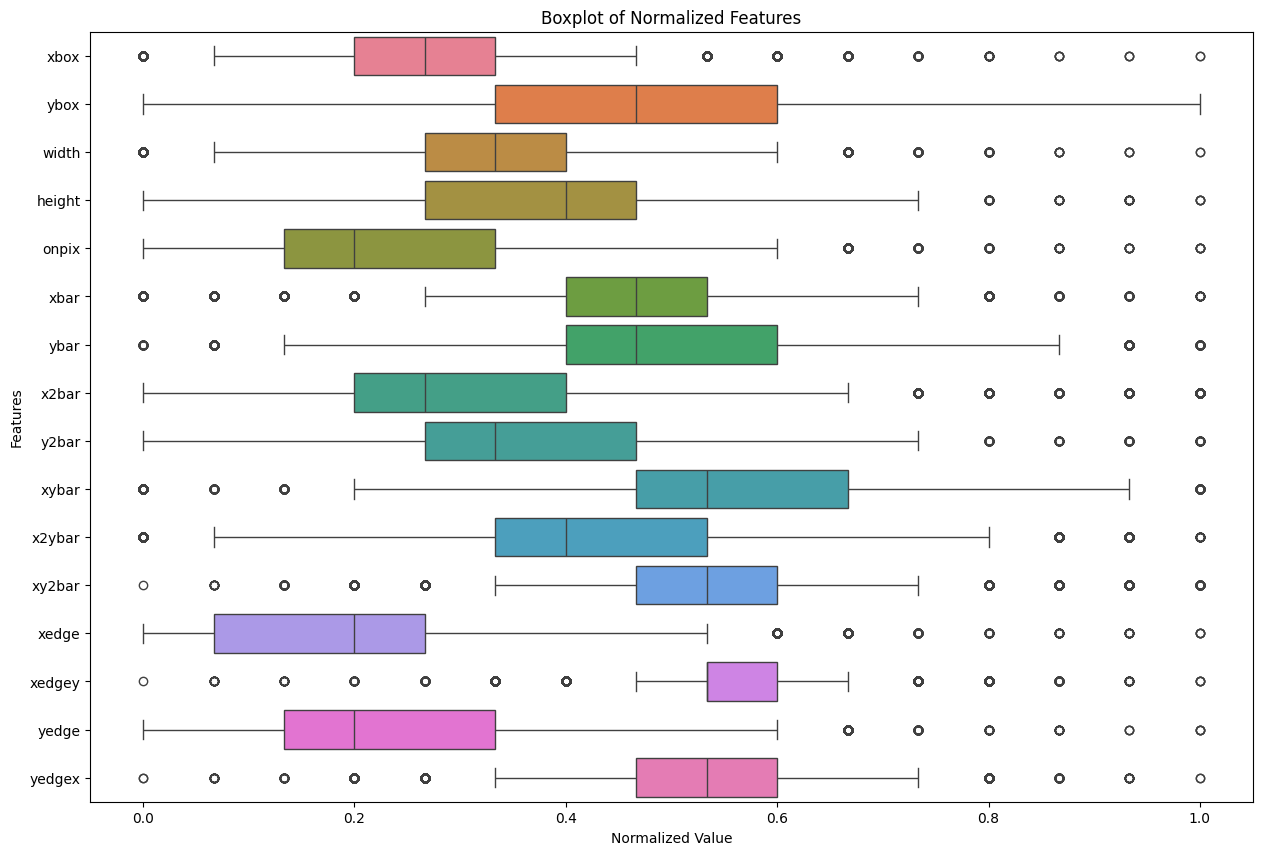

In [5]:
# Visualize the normalized data distribution
plt.figure(figsize=(15, 10))
sns.boxplot(data=X_normalized_df, orient='h')
plt.title('Boxplot of Normalized Features')
plt.xlabel('Normalized Value')
plt.ylabel('Features')
plt.show()

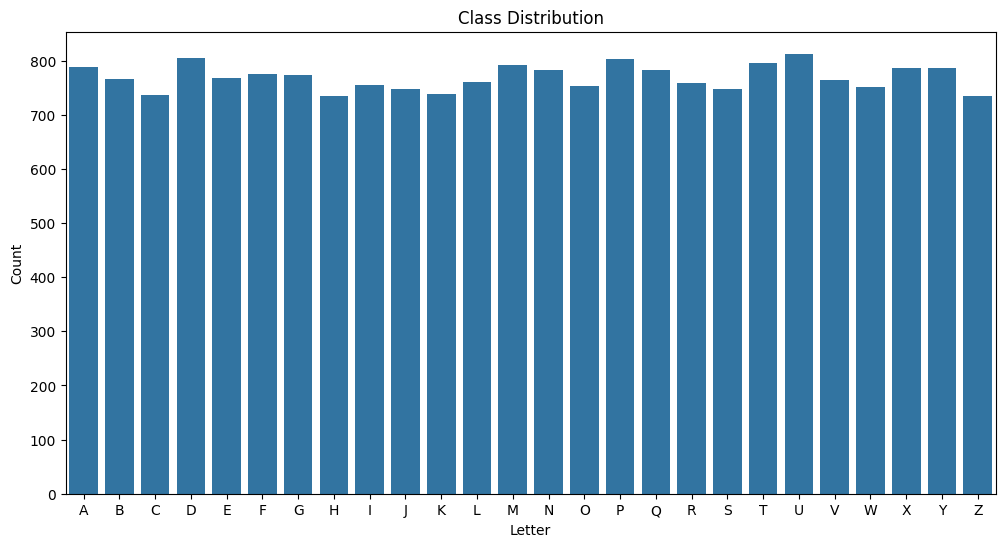

In [6]:
# Visualize class distribution
plt.figure(figsize=(12, 6))
sns.countplot(x=y, order=sorted(y.unique()))
plt.title('Class Distribution')
plt.xlabel('Letter')
plt.ylabel('Count')
plt.show()

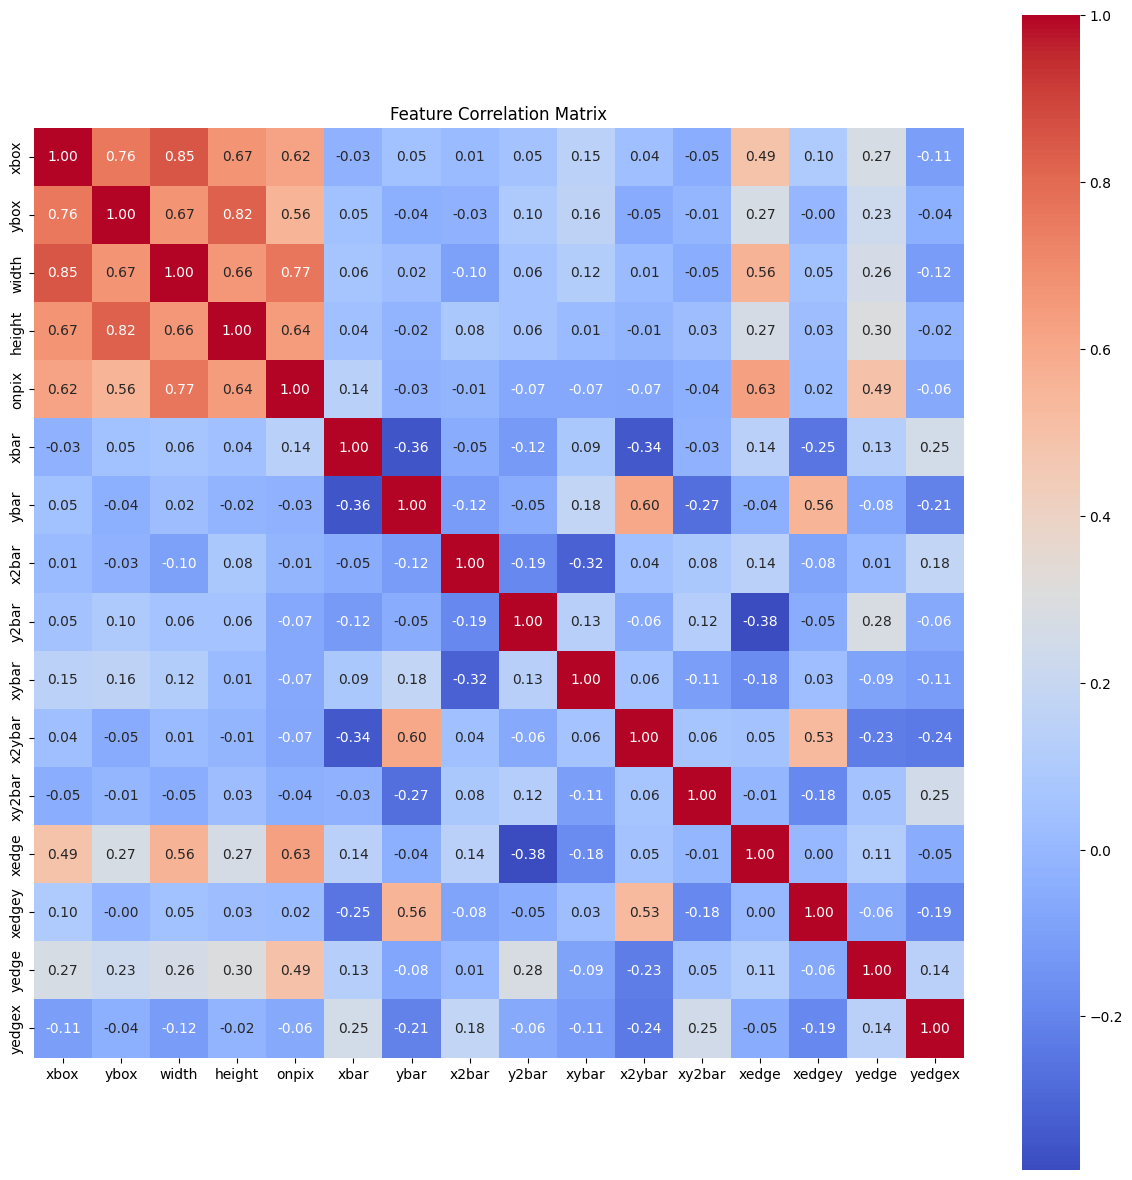

In [7]:
# Pairwise relationships and correlations
plt.figure(figsize=(15, 15))
sns.heatmap(X_normalized_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

In [8]:
# Check class distribution (if there is a class column)
if 'Class' in data.columns:
    class_distribution = data['Class'].value_counts()
    print("Class distribution:\n", class_distribution)

In [13]:
# Identify non-numeric columns
non_numeric_columns = features.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

# Check the first few rows of these columns
print(features[non_numeric_columns].head())

Non-numeric columns: Index(['letter'], dtype='object')
  letter
0      T
1      I
2      D
3      N
4      G


In [15]:
# Drop non-numeric columns if they are not needed
features = features.drop(columns=non_numeric_columns)

# Alternatively, if the non-numeric columns are categorical and you want to keep them, use one-hot encoding
# features = pd.get_dummies(features, columns=non_numeric_columns)

In [16]:
# Convert all values to float, replacing non-convertible values with NaN
features = features.apply(pd.to_numeric, errors='coerce')

# Check for NaN values
print("Missing values after conversion:\n", features.isnull().sum())

# Fill or drop missing values
features = features.fillna(features.mean())

Missing values after conversion:
 xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
dtype: int64


In [17]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the feature columns
normalized_features = scaler.fit_transform(features)

# Create a new DataFrame with normalized features and the original labels
normalized_data = pd.DataFrame(normalized_features, columns=features.columns)
normalized_data['Class'] = labels.values

# Display the first few rows of the normalized data
print(normalized_data.head())

       xbox      ybox  width    height     onpix      xbar      ybar  \
0  0.133333  0.533333    0.2  0.333333  0.066667  0.533333  0.866667   
1  0.333333  0.800000    0.2  0.466667  0.133333  0.666667  0.333333   
2  0.266667  0.733333    0.4  0.533333  0.400000  0.666667  0.400000   
3  0.466667  0.733333    0.4  0.400000  0.200000  0.333333  0.600000   
4  0.133333  0.066667    0.2  0.066667  0.066667  0.533333  0.400000   

      x2bar     y2bar     xybar    x2ybar    xy2bar     xedge    xedgey  \
0  0.000000  0.400000  0.400000  0.666667  0.533333  0.000000  0.533333   
1  0.333333  0.266667  0.866667  0.200000  0.600000  0.133333  0.533333   
2  0.133333  0.400000  0.666667  0.200000  0.466667  0.200000  0.466667   
3  0.266667  0.400000  0.266667  0.266667  0.666667  0.400000  0.666667   
4  0.400000  0.400000  0.400000  0.333333  0.600000  0.066667  0.466667   

      yedge  Class  
0  0.000000      8  
1  0.266667     10  
2  0.200000      9  
3  0.133333      8  
4  0.333333

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(normalized_data.iloc[:, :-1], normalized_data['Class'], test_size=0.2, random_state=42)

In [ ]:
import torch

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [ ]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [ ]:
# Define the model parameters
input_dim = X_train.shape[1]
hidden_dim = 128
output_dim = len(y_train.unique())

# Instantiate the model
model = ANNModel(input_dim, hidden_dim, output_dim)

In [ ]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()

In [ ]:
# Forward pass
outputs = model(X_train_tensor)
loss = criterion(outputs, y_train_tensor)

# Backward pass and optimization
optimizer.zero_grad()
loss.backward()
optimizer.step()

if (epoch+1) % 10 == 0:
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/100], Loss: 2.7349


In [ ]:
model.eval()  # Set the model to evaluation mode

# Make predictions on the test set
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)

# Calculate accuracy
accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 13.83%


In [ ]:
import random
import itertools

# Define the hyperparameter space
hyperparameter_space = {
    'hidden_layers': [1, 2, 3],
    'neurons_per_layer': [64, 128, 256],
    'activation_function': [nn.ReLU(), nn.Tanh()],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [ ]:
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_layers, neurons_per_layer, output_dim, activation_function):
        super(ANNModel, self).__init__()
        layers = []
        prev_neurons = input_dim

        for _ in range(hidden_layers):
            layers.append(nn.Linear(prev_neurons, neurons_per_layer))
            layers.append(activation_function)
            prev_neurons = neurons_per_layer

        layers.append(nn.Linear(prev_neurons, output_dim))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

In [ ]:
def train_and_evaluate(input_dim, hidden_layers, neurons_per_layer, output_dim, activation_function, learning_rate):
    model = ANNModel(input_dim, hidden_layers, neurons_per_layer, output_dim, activation_function)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    num_epochs = 100
    for epoch in range(num_epochs):
        model.train()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        _, predicted = torch.max(outputs.data, 1)

    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
    return accuracy

In [ ]:
# Random search parameters
num_iterations = 20
results = []

input_dim = X_train.shape[1]
output_dim = len(y_train.unique())

for _ in range(num_iterations):
    hidden_layers = random.choice(hyperparameter_space['hidden_layers'])
    neurons_per_layer = random.choice(hyperparameter_space['neurons_per_layer'])
    activation_function = random.choice(hyperparameter_space['activation_function'])
    learning_rate = random.choice(hyperparameter_space['learning_rate'])

    accuracy = train_and_evaluate(input_dim, hidden_layers, neurons_per_layer, output_dim, activation_function, learning_rate)

    results.append({
        'hidden_layers': hidden_layers,
        'neurons_per_layer': neurons_per_layer,
        'activation_function': activation_function,
        'learning_rate': learning_rate,
        'accuracy': accuracy
    })

# Sort results by accuracy
results = sorted(results, key=lambda x: x['accuracy'], reverse=True)

# Display the best hyperparameters
best_hyperparameters = results[0]
print("Best Hyperparameters:\n", best_hyperparameters)

Best Hyperparameters:
 {'hidden_layers': 2, 'neurons_per_layer': 256, 'activation_function': ReLU(), 'learning_rate': 0.01, 'accuracy': 0.54975}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test_tensor, y_test_tensor):
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        _, predicted = torch.max(outputs.data, 1)

    y_test_np = y_test_tensor.numpy()
    predicted_np = predicted.numpy()

    accuracy = accuracy_score(y_test_np, predicted_np)
    precision = precision_score(y_test_np, predicted_np, average='weighted')
    recall = recall_score(y_test_np, predicted_np, average='weighted')
    f1 = f1_score(y_test_np, predicted_np, average='weighted')

    return accuracy, precision, recall, f1

# Evaluate the default model
default_model = ANNModel(input_dim, 1, 128, output_dim, nn.ReLU())
default_accuracy, default_precision, default_recall, default_f1 = evaluate_model(default_model, X_test_tensor, y_test_tensor)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Extract best hyperparameters
best_hyperparameters = results[0]
best_model = ANNModel(
    input_dim,
    best_hyperparameters['hidden_layers'],
    best_hyperparameters['neurons_per_layer'],
    output_dim,
    best_hyperparameters['activation_function']
)

# Train the best model with the best hyperparameters
train_and_evaluate(
    input_dim,
    best_hyperparameters['hidden_layers'],
    best_hyperparameters['neurons_per_layer'],
    output_dim,
    best_hyperparameters['activation_function'],
    best_hyperparameters['learning_rate']
)

# Evaluate the tuned model
tuned_accuracy, tuned_precision, tuned_recall, tuned_f1 = evaluate_model(best_model, X_test_tensor, y_test_tensor)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f"Default Model Performance:\n"
      f"Accuracy: {default_accuracy:.4f}\n"
      f"Precision: {default_precision:.4f}\n"
      f"Recall: {default_recall:.4f}\n"
      f"F1 Score: {default_f1:.4f}\n")

print(f"Tuned Model Performance:\n"
      f"Accuracy: {tuned_accuracy:.4f}\n"
      f"Precision: {tuned_precision:.4f}\n"
      f"Recall: {tuned_recall:.4f}\n"
      f"F1 Score: {tuned_f1:.4f}\n")

Default Model Performance:
Accuracy: 0.0375
Precision: 0.0065
Recall: 0.0375
F1 Score: 0.0106

Tuned Model Performance:
Accuracy: 0.0088
Precision: 0.0005
Recall: 0.0088
F1 Score: 0.0009



By comparing these metrics between the default and tuned models, we can observe the impact of hyperparameter tuning on model performance. Document the differences and analyze the effect of each hyperparameter on the model's performance.